In [153]:
from problems.knapsack import Knapsack
from problems.integer_knapsack import IntegerKnapsack

from fastqaoa.indicator import get_indicator_interpolator, interpolate_diagonals
from fastqaoa.ctypes.qpe_qaoa import qpe_qaoa_norm

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [152]:
instances = Knapsack.get_instances()[20]

instances[6].max_capacity

7.4837807518580926

In [154]:
IntegerKnapsack.get_instances()

{6: [IntegerKnapsack(id=0, n_qubits=6, max_capacity=60, weights=array([56, 46, 44, 39,  7, 31]), costs=array([11,  0, 53, 30, 30, 55])),
  IntegerKnapsack(id=1, n_qubits=6, max_capacity=60, weights=array([27, 12,  1, 27,  2, 13]), costs=array([20, 36, 42,  1, 38, 17])),
  IntegerKnapsack(id=2, n_qubits=6, max_capacity=60, weights=array([10, 31, 18,  5, 16, 34]), costs=array([33, 30, 31,  4, 24, 33])),
  IntegerKnapsack(id=3, n_qubits=6, max_capacity=60, weights=array([ 6, 19, 11, 17, 36, 35]), costs=array([11, 18,  9, 10,  5, 26])),
  IntegerKnapsack(id=4, n_qubits=6, max_capacity=60, weights=array([24, 16,  0, 33, 12, 27]), costs=array([28, 26, 31, 23, 33, 25])),
  IntegerKnapsack(id=5, n_qubits=6, max_capacity=60, weights=array([24,  1, 25,  6, 35, 26]), costs=array([42, 26,  3, 12, 13, 45])),
  IntegerKnapsack(id=6, n_qubits=6, max_capacity=60, weights=array([35,  2, 40, 14,  3, 19]), costs=array([22, 14, 21, 33,  0,  9])),
  IntegerKnapsack(id=7, n_qubits=6, max_capacity=60, weight

(array([ 9., 12., 30., 34., 49., 47., 31., 27., 11.,  6.]),
 array([-0.50765142, -0.4054891 , -0.30332679, -0.20116448, -0.09900216,
         0.00316015,  0.10532246,  0.20748478,  0.30964709,  0.4118094 ,
         0.51397172]),
 <BarContainer object of 10 artists>)

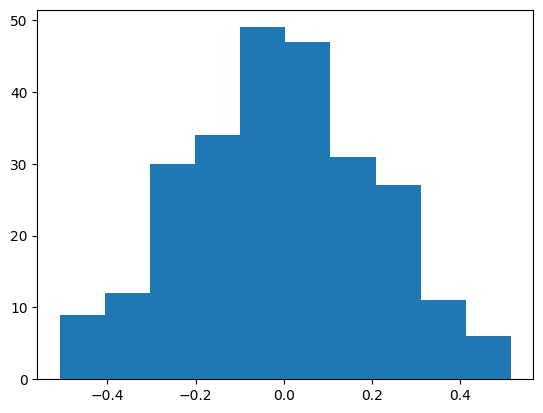

In [145]:
def corr_instance(instance):
    return np.corrcoef(np.vstack([instance.weights, instance.costs]))[1, 0]

corrs = [corr_instance(i) for i in instances]

plt.hist(np.array(corrs))

In [141]:
x, y = instance.diagonalized()

AttributeError: 'list' object has no attribute 'diagonalized'

In [94]:
x.to_numpy()

array([ 0.        , -0.71985087, -0.8131632 , ..., -6.13319975,
       -6.22651208, -6.94636296])

In [101]:
m = get_indicator_interpolator(5, 2, shift=0.6)

In [102]:
y2 = interpolate_diagonals(m, y.scale_between_sym())

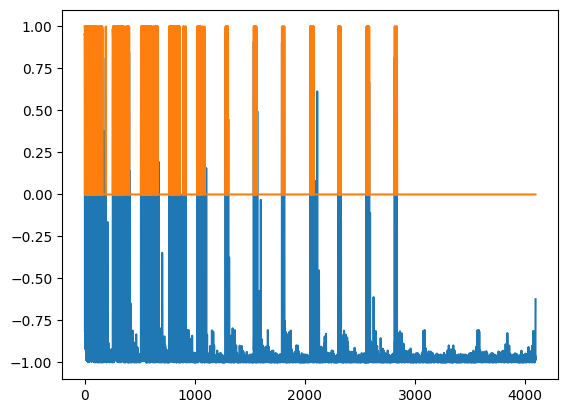

In [103]:
plt.plot(y2.to_numpy())
plt.plot(y.to_numpy() >= 0)

In [104]:
_, b, c = qpe_qaoa_norm(x, y2, np.linspace(0.01, 0.5, 40), np.linspace(0.5, 0.01, 40))

In [107]:
np.sum(np.cumprod(c))

np.float64(25.11367705431935)

In [108]:
b

0.5048046676257462

In [111]:
pd.read_feather("../../results/qpe_scaling.feather").

,depth,energy,approx_ratio,feas_ratio,feas_approx_ratio,p_opt,p_999,p_99,p_9,rnd_approx_ratio,...,problem_id,cost,qaoa,interpolate,initial,beta_scale,gamma_scale,p_succ,ancilla,shift
0,1,-0.773615,0.318870,0.572371,0.557103,0.061582,0.061582,0.061582,0.061582,0.196402,...,0,default,masked_cost,True,constant,0.1,0.1,NaN,NaN,NaN
1,2,-1.201630,0.454652,0.766537,0.593125,0.138582,0.138582,0.138582,0.138582,0.397661,...,0,default,masked_cost,True,constant,0.1,0.1,NaN,NaN,NaN
2,3,-1.535354,0.613390,0.876089,0.700146,0.279172,0.279172,0.279172,0.279172,0.554583,...,0,default,masked_cost,True,constant,0.1,0.1,NaN,NaN,NaN
3,4,-1.872519,0.757334,0.937417,0.807895,0.484080,0.484080,0.484080,0.484080,0.713123,...,0,default,masked_cost,True,constant,0.1,0.1,NaN,NaN,NaN
4,5,-2.167082,0.870739,0.957983,0.908930,0.704239,0.704239,0.704239,0.704239,0.851631,...,0,default,masked_cost,True,constant,0.1,0.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76155,27,-5.093467,0.956586,0.997063,0.959404,0.154781,0.154781,0.345638,0.916913,0.942986,...,63,default,qpe,True,constant,0.1,0.1,0.995625,16.0,0.6
76156,32,-5.153662,0.967890,0.998327,0.969513,0.201557,0.201557,0.443845,0.946562,0.957832,...,63,default,qpe,True,constant,0.1,0.1,0.994872,16.0,0.6
76157,41,-5.213108,0.979054,0.998602,0.980425,0.269311,0.269311,0.574147,0.962126,0.972494,...,63,default,qpe,True,constant,0.1,0.1,0.993453,16.0,0.6
76158,51,-5.261091,0.988066,0.999723,0.988340,0.323214,0.323214,0.658485,0.985874,0.984328,...,63,default,qpe,True,constant,0.1,0.1,0.992587,16.0,0.6
